In [1]:
import intake
import uxarray as ux
import cartopy.crs as ccrs
import healpy
import cmocean
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.feature as cf
import time

In [2]:
cat_url = "https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml"
cat = intake.open_catalog(cat_url)['NCAR']


In [3]:
model_run = cat.wrf_conus

In [4]:
%%time
ds= model_run(zoom=10).to_dask()
a=ds['eastward_wind'][:744]
a


CPU times: user 3.92 s, sys: 941 ms, total: 4.86 s
Wall time: 27 s


/glade/u/apps/opt/conda/envs/2025-digital-earths-global-hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.DataArray 'eastward_wind' (Time: 744, cell: 773909)> Size: 2GB
dask.array<getitem, shape=(744, 773909), dtype=float32, chunksize=(47, 262144), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) datetime64[ns] 6kB 2000-01-01 ... 2000-01-31T23:00:00
  * cell     (cell) int64 6MB 2160469 2160470 2160471 ... 8388606 8388607
    crs      float32 4B nan
Attributes:
    description:       U at 10 M
    domain_extent:     (-138.73135, -57.068634, 17.647308, 57.34342)
    grid_mapping:      healpix_nested
    healpix_nside:     1024
    long_name:         U-component wind with respect to model grid at 10 meters
    quantization:      quantization_info
    quantization_nsd:  5
    regrid_method:     easygems_delaunay
    stagger:           
    units:             m s-1

In [5]:
%%time
ds

CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 2.86 μs


<xarray.Dataset> Size: 5TB
Dimensions:                      (Time: 184104, cell: 773909)
Coordinates:
  * Time                         (Time) datetime64[ns] 1MB 2000-01-01 ... 202...
  * cell                         (cell) int64 6MB 2160469 2160470 ... 8388607
    crs                          float32 4B nan
Data variables:
    eastward_wind                (Time, cell) float32 570GB dask.array<chunksize=(47, 262144), meta=np.ndarray>
    northward_wind               (Time, cell) float32 570GB dask.array<chunksize=(47, 262144), meta=np.ndarray>
    precipitation_flux           (Time, cell) float32 570GB dask.array<chunksize=(48, 262144), meta=np.ndarray>
    specific_humidity            (Time, cell) float32 570GB dask.array<chunksize=(48, 262144), meta=np.ndarray>
    surface_air_pressure         (Time, cell) float32 570GB dask.array<chunksize=(48, 262144), meta=np.ndarray>
    surface_temperature          (Time, cell) float32 570GB dask.array<chunksize=(48, 262144), meta=np.ndarray>
    toa_outgoing_longwave_flux   (Time, cell) float32 570GB dask.array<chunksize=(48, 262144), meta=np.ndarray>
    toa_outgoing_shortwave_flux  (Time, cell) float32 570GB dask.array<chunksize=(48, 262144), meta=np.ndarray>
    LANDMASK                     (cell) float32 3MB dask.array<chunksize=(262144,), meta=np.ndarray>
Attributes:
    description:       U at 10 M
    domain_extent:     (-138.73135, -57.068634, 17.647308, 57.34342)
    grid_mapping:      healpix_nested
    healpix_nside:     1024
    long_name:         U-component wind with respect to model grid at 10 meters
    quantization:      quantization_info
    quantization_nsd:  5
    regrid_method:     easygems_delaunay
    stagger:           
    units:             m s-1

In [7]:
# egh.healpix_show(ds.eastward_wind.isel(Time=0), ax=ax, cmap=cmocean.cm.thermal)

/glade/u/apps/opt/conda/envs/2025-digital-earths-global-hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


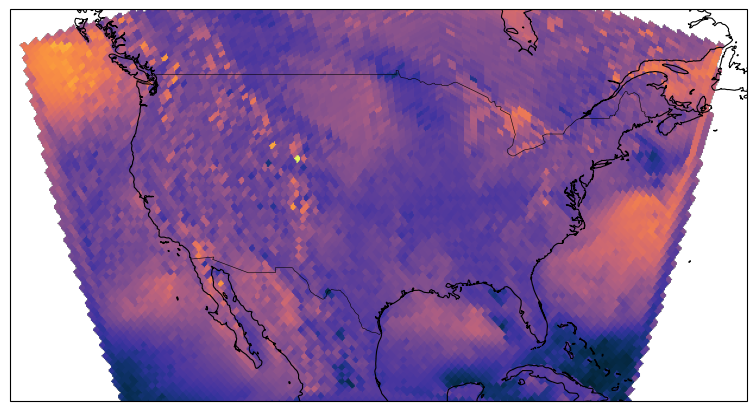

/glade/u/apps/opt/conda/envs/2025-digital-earths-global-hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


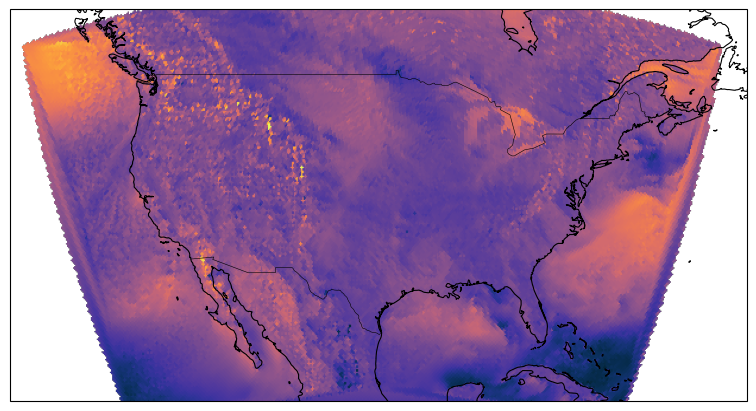

/glade/u/apps/opt/conda/envs/2025-digital-earths-global-hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


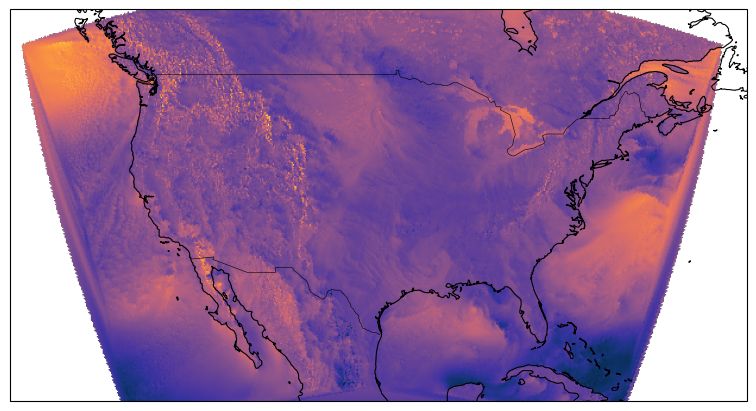

/glade/u/apps/opt/conda/envs/2025-digital-earths-global-hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


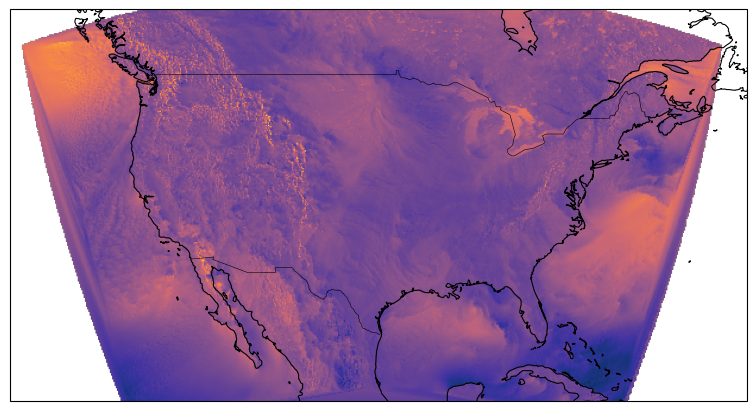

In [8]:
zoom_level=[7,8,9,10]
time_zoom=[]
projection = ccrs.Robinson(central_longitude=-100)

for z in zoom_level:
    start_time=time.time()
    ds= model_run(zoom=z).to_dask()
    a=ds['eastward_wind'].cell.values
    end_time=time.time()
    total_time=end_time-start_time
    time_zoom.append(total_time)


    fig, ax = plt.subplots(
        figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
    )
    ax.set_extent([-135, -60, 20, 55], crs=ccrs.PlateCarree())
    
    egh.healpix_show(ds.eastward_wind.isel(Time=0), ax=ax, cmap=cmocean.cm.thermal)
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)
    plt.show()

Text(0.5, 1.0, 'Time vs Zoom')

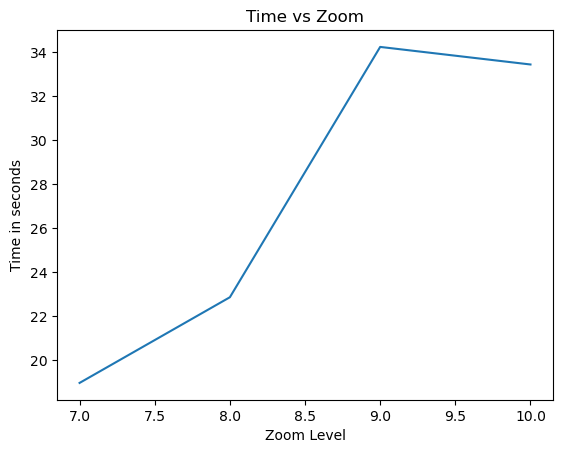

In [9]:
plt.plot(zoom_level,time_zoom)
plt.xlabel('Zoom Level')
plt.ylabel('Time in seconds')
plt.title('Time vs Zoom')

In [ ]:
ds.eastward_wind.isel(Time=0)

### HEALPIX FOR REGIONAL DATA LIKE CONUS DOESN'T WORK (YET)

In [ ]:
uxds = ux.UxDataset.from_healpix(ds)
# uxds=uxds.eastward_wind
uxds

In [ ]:
uxds2 = uxds.drop_vars("cell")

In [ ]:
uxds2

In [ ]:
uxda = uxds.isel(Time=10)

In [ ]:
uxda.plot()

In [ ]:
uxds2.isel(Time=10)